# Análisis de datos

**Andrés Chaparro** 

**Juan Andrés Bernal**



In [1]:

import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,silhouette_samples, silhouette_score

import scipy.stats as stats

# 1. Carga de datos (csv)
Se cargan la base de datos (txt) para trabajar con estos

In [9]:
direccion_B2C_transacciones = 'Datos/base_1_transaccional.txt'

data_original_B2C_transacciones = pd.read_csv(direccion_B2C_transacciones, sep="\t", encoding='utf-8')

print("\nShape of B2C transactions data:", data_original_B2C_transacciones.shape) 



Shape of B2C transactions data: (2099836, 18)


In [ ]:
data_original_B2C_transacciones.head()

,fecha,pedido,id,edad,municipio,zona,asesor,punto de venta,cluster,categoria_macro,categoria,subcategoria,producto,color,cantidad,precio,valor,alineación con portafolio estratégico
0,1971-04-30,2,2,52,EL CARMEN DE CHUCURI,SANTANDER,asesor_2,punto_venta_2,cluster_tienda_2,categoria_macro_1,categoria_2,subcategoria_2,producto_2,GRIS,1.00,32.88,32.88,2.920320
1,1971-04-30,3,3,31,VILLANUEVA,LA GUAJIRA,asesor_3,punto_venta_2,cluster_tienda_2,categoria_macro_2,categoria_3,subcategoria_3,producto_3,BEIGE,2.00,0.56,1.13,0.117504
2,1971-04-30,4,4,43,VILLANUEVA,LA GUAJIRA,asesor_4,punto_venta_2,cluster_tienda_2,categoria_macro_3,categoria_4,subcategoria_4,producto_4,No encontrado,1.00,8.38,8.38,1.251072
3,1971-04-30,5,5,31,VILLANUEVA,LA GUAJIRA,asesor_5,punto_venta_3,cluster_tienda_3,categoria_macro_2,categoria_5,subcategoria_5,producto_5,BLANCO,21.14,2.27,47.99,3.729024
4,1971-04-30,6,6,49,ARROYOHONDO,BOLÍVAR,asesor_6,punto_venta_4,cluster_tienda_2,categoria_macro_4,categoria_6,subcategoria_6,producto_6,No encontrado,1.00,9.96,9.96,1.223424


# 2. Entendimientos de los datos 

In [ ]:
data_original_B2C_transacciones.describe().round(2)

,pedido,id,edad,cantidad,precio,valor,alineación con portafolio estratégico
count,2099836.00,2099836.00,2099836.00,2099836.00,2099305.00,2099836.00,2099836.00
mean,467009.18,165352.00,41.87,38.05,9.24,39.99,3.95
std,270549.12,121459.27,9.56,746.40,29.53,165.07,21.92
min,2.00,1.00,18.00,0.00,0.00,0.00,-24187.46
25%,231701.00,58294.00,32.00,1.00,0.65,4.69,0.47
50%,466824.00,137973.00,43.00,3.02,2.99,13.32,1.41
75%,702678.25,261744.25,49.00,12.96,6.27,37.13,3.73
max,933936.00,419226.00,67.00,489689.00,12043.48,56876.09,4162.23


In [ ]:
# Para variables numéricas (continuas)
continuous_vars = data_original_B2C_transacciones.select_dtypes(include=['int64', 'float64'])
print(f"Número de variables continuas: {len(continuous_vars.columns)}")

# Para variables categóricas
categorical_vars = data_original_B2C_transacciones.select_dtypes(include=['object', 'category'])
print(f"Número de variables categóricas: {len(categorical_vars.columns)}")

# Para mostrar cuáles son las variables categóricas
print("\nVariables categóricas:")
for col in categorical_vars.columns:
    unique_values = len(data_original_B2C_transacciones[col].unique())
    print(f"- {col}: {unique_values} categorías únicas")

Número de variables continuas: 7
Número de variables categóricas: 11

Variables categóricas:
- fecha: 756 categorías únicas
- municipio: 808 categorías únicas
- zona: 35 categorías únicas
- asesor: 608 categorías únicas
- punto de venta: 66 categorías únicas
- cluster: 9 categorías únicas
- categoria_macro: 5 categorías únicas
- categoria: 27 categorías únicas
- subcategoria: 102 categorías únicas
- producto: 7280 categorías únicas
- color: 69 categorías únicas


### Datos Nulos

In [ ]:
features = data_original_B2C_transacciones.columns
print("\nCantidad de datos nulos:")
data_original_B2C_transacciones[features].isnull().sum() 


Cantidad de datos nulos:


fecha                                      0
pedido                                     0
id                                         0
edad                                       0
municipio                                  0
zona                                      18
asesor                                     0
punto de venta                             0
cluster                                    0
categoria_macro                            0
categoria                                  0
subcategoria                               0
producto                                   0
color                                      0
cantidad                                   0
precio                                   531
valor                                      0
alineación con portafolio estratégico      0
dtype: int64

In [ ]:
print("\nPorcentaje de datos nulos:")
data_original_B2C_transacciones[features].isnull().sum() /data_original_B2C_transacciones.shape[0] * 100


Porcentaje de datos nulos:


fecha                                    0.000000
pedido                                   0.000000
id                                       0.000000
edad                                     0.000000
municipio                                0.000000
zona                                     0.000857
asesor                                   0.000000
punto de venta                           0.000000
cluster                                  0.000000
categoria_macro                          0.000000
categoria                                0.000000
subcategoria                             0.000000
producto                                 0.000000
color                                    0.000000
cantidad                                 0.000000
precio                                   0.025288
valor                                    0.000000
alineación con portafolio estratégico    0.000000
dtype: float64

### HeatMap de Correlaciones

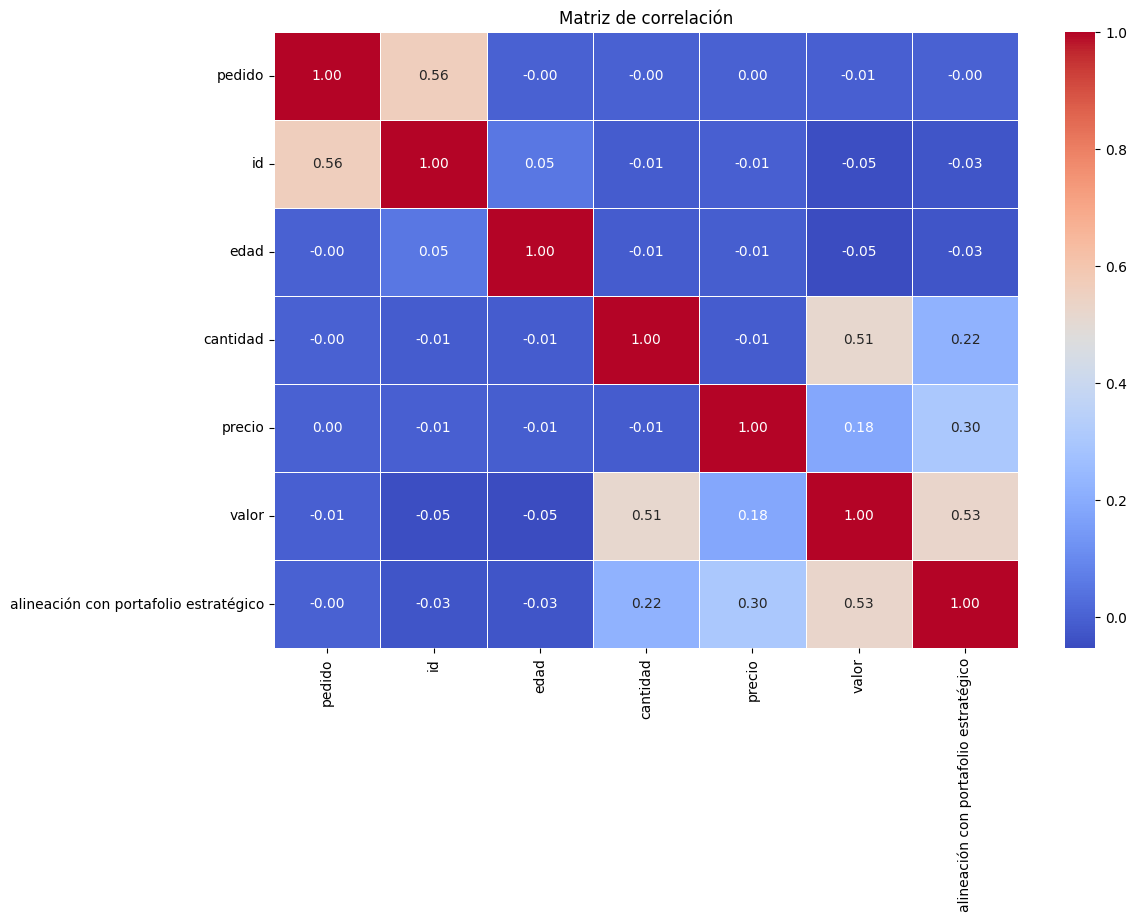

In [ ]:
numeric_columns = data_original_B2C_transacciones.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(data_original_B2C_transacciones[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()


# 3. Limpieza de datos

### Limpieza de datos por datos nulos

Teniendo en cuenta que los datos nulos representan nomas el 0.015% de los datos se van a eliminar ya que no generaran mayores problemas ni falta de información para el modelo

In [ ]:
total_nulls = data_original_B2C_transacciones[features].isnull().sum().sum()
total_values = data_original_B2C_transacciones.shape[0] * data_original_B2C_transacciones.shape[1]
print(f"\nPorcentaje total de datos nulos: {(total_nulls/total_values * 100):.4f}%")


Porcentaje total de datos nulos: 0.0015%


In [11]:
data_original_B2C_transacciones_1 = data_original_B2C_transacciones.copy()
data_original_B2C_transacciones_1 = data_original_B2C_transacciones_1.dropna()


### Limpieza de Outliers

No se eliminan otuliers dado qeu son muchos y esto puede significar que sean una agrupación 

In [12]:
import numpy as np
import pandas as pd

# Función para contar outliers usando IQR
def contar_outliers_iqr(df):
    outliers_por_variable = {}
    
    for columna in df.select_dtypes(include=np.number):  # Solo variables numéricas
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
        outliers_por_variable[columna] = len(outliers)
    
    return outliers_por_variable

# Contar outliers en cada variable de datos_limpios2
outliers = contar_outliers_iqr(data_original_B2C_transacciones_1)

# Mostrar resultados en un DataFrame
df_outliers = pd.DataFrame(outliers.items(), columns=["Variable", "Cantidad de Outliers"])
df_outliers["Porcentaje de Outliers"] = (df_outliers["Cantidad de Outliers"] / len(data_original_B2C_transacciones) * 100).round(2)
df_outliers


,Variable,Cantidad de Outliers,Porcentaje de Outliers
0,pedido,0,0.00
1,id,0,0.00
2,edad,0,0.00
3,cantidad,303520,14.45
4,precio,328346,15.64
5,valor,211081,10.05
6,alineación con portafolio estratégico,207447,9.88


# Ingenieria de Caracteres

### Variable tiempo desde la ultima fecha de compra

In [13]:
data_original_B2C_transacciones_1.head(1)

,fecha,pedido,id,edad,municipio,zona,asesor,punto de venta,cluster,categoria_macro,categoria,subcategoria,producto,color,cantidad,precio,valor,alineación con portafolio estratégico
0,1971-04-30,2,2,52,EL CARMEN DE CHUCURI,SANTANDER,asesor_2,punto_venta_2,cluster_tienda_2,categoria_macro_1,categoria_2,subcategoria_2,producto_2,GRIS,1.0,32.88,32.88,2.92032


In [14]:
df_clientes = data_original_B2C_transacciones_1.groupby('id').agg(
    cantidad_transacciones=('id', 'count'),
    ultima_transaccion=('fecha', 'max')
).reset_index()


In [15]:
print("\nClientes con más transacciones:")
df_clientes.sort_values('cantidad_transacciones', ascending=False).head()


Clientes con más transacciones:


,id,cantidad_transacciones,ultima_transaccion
3036,3037,1735,1973-01-27
1235,1236,1671,1973-01-28
2905,2906,1555,1973-01-24
3120,3121,1361,1973-01-29
3356,3357,1318,1973-01-30


### 3.3 Transformacion

Para garantizar que todas las variables tengan la misma escala y evitar que aquellas con valores más grandes dominen el análisis, aplicamos **StandardScaler**, una técnica de normalización que estandariza los datos restando la media y dividiendo por la desviación estándar. Esto es especialmente importante en algoritmos de **aprendizaje no supervisado**, como los de agrupación, ya que mejora la comparación entre características y permite obtener clusters más representativos.

In [16]:
# Select only numeric columns
numeric_columns = data_original_B2C_transacciones_1.select_dtypes(include=['int64', 'float64']).columns
non_numeric_columns = data_original_B2C_transacciones_1.select_dtypes(exclude=['int64', 'float64']).columns

# Scale only the numeric columns
standard_scaler = StandardScaler()
df_B2C_trans_norm_numeric = standard_scaler.fit_transform(data_original_B2C_transacciones_1[numeric_columns])
df_B2C_trans_norm_numeric = pd.DataFrame(df_B2C_trans_norm_numeric, columns=numeric_columns, index=data_original_B2C_transacciones_1.index)

# Combine with non-numeric columns
df_B2C_trans_norm = pd.concat([
    df_B2C_trans_norm_numeric,
    data_original_B2C_transacciones_1[non_numeric_columns]
], axis=1)

# Reorder columns to match original order
df_B2C_trans_norm = df_B2C_trans_norm[data_original_B2C_transacciones_1.columns]

# Show the normalized data
df_B2C_trans_norm.describe()



,pedido,id,edad,cantidad,precio,valor,alineación con portafolio estratégico
count,2.099287e+06,2.099287e+06,2.099287e+06,2.099287e+06,2.099287e+06,2.099287e+06,2.099287e+06
mean,-9.119698e-17,-1.061438e-16,2.856709e-16,-4.177041e-17,-2.118813e-17,-8.188909e-17,-8.303650e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.726273e+00,-1.361587e+00,-2.496213e+00,-5.078690e-02,-3.130390e-01,-2.422964e-01,-1.103418e+03
25%,-8.697632e-01,-8.813865e-01,-1.032218e+00,-4.964824e-02,-2.910280e-01,-2.138884e-01,-1.583940e-01
50%,-6.595640e-04,-2.254356e-01,1.180638e-01,-4.691548e-02,-2.117882e-01,-1.616152e-01,-1.156749e-01
75%,8.710888e-01,7.936328e-01,7.454902e-01,-3.362673e-02,-1.007170e-01,-1.727336e-02,-1.005946e-02
max,1.725849e+00,2.090060e+00,2.627770e+00,6.559321e+02,4.075173e+02,3.442646e+02,1.896674e+02


In [17]:
features = df_B2C_trans_norm.columns
print("\nCantidad de datos nulos:")
df_B2C_trans_norm[features].isnull().sum() 


Cantidad de datos nulos:


fecha                                    0
pedido                                   0
id                                       0
edad                                     0
municipio                                0
zona                                     0
asesor                                   0
punto de venta                           0
cluster                                  0
categoria_macro                          0
categoria                                0
subcategoria                             0
producto                                 0
color                                    0
cantidad                                 0
precio                                   0
valor                                    0
alineación con portafolio estratégico    0
dtype: int64

# Preparación de las características para el modelo

In [18]:
# Renombramos para facilidad de uso
transacciones = data_original_B2C_transacciones
cotizaciones = pd.read_csv('Datos/base_2_cotizaciones.txt', sep="\t", encoding='utf-8')

# 1. Crear matriz de interacciones usuario-item para Collaborative Filtering
# Combinamos las transacciones (compras realizadas) con un peso mayor
def crear_matriz_interacciones():
    # Para transacciones (peso = 1.0)
    interacciones_trans = transacciones[['id', 'producto', 'valor']]
    interacciones_trans['tipo'] = 'compra'
    interacciones_trans['peso'] = 1.0
    
    # Para cotizaciones (peso = 0.3, ya que mostró interés pero no compró)
    interacciones_cot = cotizaciones[['id', 'producto', 'valor']]
    interacciones_cot['tipo'] = 'cotizacion'
    interacciones_cot['peso'] = 0.3
    
    # Combinar ambas fuentes
    interacciones = pd.concat([interacciones_trans, interacciones_cot], ignore_index=True)
    
    # Crear índices para usuarios y productos
    usuarios_idx = {id: idx for idx, id in enumerate(interacciones['id'].unique())}
    productos_idx = {prod: idx for idx, prod in enumerate(interacciones['producto'].unique())}
    
    # Convertir a matriz usuario-item
    filas = interacciones['id'].map(usuarios_idx).values
    columnas = interacciones['producto'].map(productos_idx).values
    valores = interacciones['peso'].values * np.log1p(interacciones['valor'].values)  # Aplicamos log para suavizar valores extremos
    
    # Crear matriz dispersa
    shape = (len(usuarios_idx), len(productos_idx))
    matriz_interacciones = csr_matrix((valores, (filas, columnas)), shape=shape)
    
    return matriz_interacciones, usuarios_idx, productos_idx

# 2. Extraer características de productos para Content-Based Filtering
def extraer_caracteristicas_productos():
    # Seleccionar las columnas relevantes de productos
    productos_info = transacciones[['producto', 'categoria_macro', 'categoria', 'subcategoria', 'color', 
                                   'alineación con portafolio estratégico']].drop_duplicates()
    
    # One-hot encoding para variables categóricas
    categoricas = ['categoria_macro', 'categoria', 'subcategoria', 'color']
    encoded = pd.get_dummies(productos_info, columns=categoricas, prefix=categoricas, drop_first=True)
    
    # Agregar las columnas de alineación y producto
    encoded['alineacion'] = productos_info['alineación con portafolio estratégico'].values
    encoded['producto'] = productos_info['producto'].values
    features_df = encoded
    
    return features_df

# 3. Crear perfiles de usuarios basados en sus interacciones
def crear_perfiles_usuarios():
    # Agrupar transacciones por usuario
    user_profiles = transacciones.groupby('id').agg({
        'edad': 'mean',
        'valor': 'sum',
        'cantidad': 'sum',
        'categoria_macro': lambda x: list(x),
        'categoria': lambda x: list(x),
        'punto de venta': lambda x: list(x),
        'municipio': lambda x: list(x)
    }).reset_index()
    
    # Añadir información de cotizaciones
    cotizaciones_por_usuario = cotizaciones.groupby('id').size().reset_index(name='num_cotizaciones')
    user_profiles = user_profiles.merge(cotizaciones_por_usuario, on='id', how='left')
    user_profiles['num_cotizaciones'] = user_profiles['num_cotizaciones'].fillna(0)
    
    # Calcular categorías preferidas
    def get_top_categories(categories):
        from collections import Counter
        return [cat for cat, _ in Counter(categories).most_common(3)]
    
    user_profiles['top_categorias'] = user_profiles['categoria'].apply(get_top_categories)
    
    return user_profiles

# Ejecutar las funciones de preparación
try:
    matriz_interacciones, usuarios_idx, productos_idx = crear_matriz_interacciones()
    features_productos = extraer_caracteristicas_productos()
    perfiles_usuarios = crear_perfiles_usuarios()
    
    print("Matriz de interacciones creada con forma:", matriz_interacciones.shape)
    print("Características de productos extraídas para", len(features_productos), "productos")
    print("Perfiles creados para", len(perfiles_usuarios), "usuarios")
except Exception as e:
    print("Error en la preparación de datos:", e)

C:\Users\andre\AppData\Local\Temp\ipykernel_40916\2179528454.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interacciones_trans['tipo'] = 'compra'
C:\Users\andre\AppData\Local\Temp\ipykernel_40916\2179528454.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interacciones_trans['peso'] = 1.0
C:\Users\andre\AppData\Local\Temp\ipykernel_40916\2179528454.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

KeyboardInterrupt: 

# Implementar el Collaborative Filtering con Matrix Factorization

In [ ]:
def implementar_collaborative_filtering(matriz_interacciones, n_factors=50):
    # Aplicar SVD para factorizar la matriz de interacciones
    svd = TruncatedSVD(n_components=n_factors, random_state=42)
    
    # Ajustar el modelo
    matriz_usuarios = svd.fit_transform(matriz_interacciones)
    matriz_items = svd.components_.T
    
    print(f"Varianza explicada: {svd.explained_variance_ratio_.sum():.4f}")
    
    return matriz_usuarios, matriz_items, svd

# Implementar CF
try:
    matriz_usuarios, matriz_items, modelo_svd = implementar_collaborative_filtering(matriz_interacciones)
    print("Modelo de collaborative filtering creado con éxito")
    print("Forma de matriz de usuarios:", matriz_usuarios.shape)
    print("Forma de matriz de ítems:", matriz_items.shape)
except Exception as e:
    print("Error en la implementación del collaborative filtering:", e)

Varianza explicada: 0.4560
Modelo de collaborative filtering creado con éxito
Forma de matriz de usuarios: (423519, 50)
Forma de matriz de ítems: (7280, 50)


# Implementar el Content-Based Filtering

In [ ]:
from sklearn.neighbors import NearestNeighbors

def implementar_content_based_filtering(features_productos, top_k=10):
    # Normalizar características
    scaler = StandardScaler()
    features_numericas = features_productos.select_dtypes(include=[np.number])
    features_escaladas = scaler.fit_transform(features_numericas)
    
    # Usar NearestNeighbors para calcular únicamente los top_k vecinos
    nn_model = NearestNeighbors(n_neighbors=top_k, metric='cosine', algorithm='brute')
    nn_model.fit(features_escaladas)
    
    # Para cada producto, obtiene sus top_k vecinos
    distances, indices = nn_model.kneighbors(features_escaladas)
    
    return distances, indices

# Implementación
try:
    distances, indices = implementar_content_based_filtering(features_productos, top_k=10)
    print("Vecinos más cercanos obtenidos para cada producto")
except Exception as e:
    print("Error en la implementación del content-based filtering:", e)

Vecinos más cercanos obtenidos para cada producto


# Crear el sistema híbrido de recomendaciones

In [ ]:
def implementar_content_based_filtering_optimizado(features_productos, top_k=50):
    """
    Implementación optimizada para memoria que sólo calcula los top_k vecinos más cercanos
    en lugar de la matriz completa de similitud.
    """
    # Seleccionar solo las columnas numéricas para la similitud
    features_numericas = features_productos.drop('producto', axis=1)
    
    # Normalizar características para que todas tengan el mismo peso
    scaler = StandardScaler()
    features_escaladas = scaler.fit_transform(features_numericas)
    
    # En lugar de calcular toda la matriz de similitud, usamos NearestNeighbors
    # que es más eficiente en términos de memoria y tiempo
    nn_model = NearestNeighbors(
        n_neighbors=min(top_k + 1, len(features_productos)),  # +1 porque el primero es el mismo producto
        metric='cosine',
        algorithm='auto',  # 'auto' elegirá el algoritmo más eficiente
        n_jobs=-1  # Usar todos los núcleos disponibles
    )
    nn_model.fit(features_escaladas)
    
    # Crear mapeo de productos a índices
    productos = features_productos['producto'].values
    indices_productos = {prod: idx for idx, prod in enumerate(productos)}
    
    return nn_model, indices_productos, features_escaladas

class SistemaRecomendacionHibrido:
    def __init__(self, matriz_usuarios, matriz_items, nn_model, 
                 usuarios_idx, productos_idx, indices_productos_cb, features_productos, perfiles_usuarios,
                 features_escaladas, peso_cf=0.7, peso_cb=0.3, top_k=50):
        self.matriz_usuarios = matriz_usuarios
        self.matriz_items = matriz_items
        self.nn_model = nn_model  # Modelo de NearestNeighbors en lugar de matriz de similitud
        self.usuarios_idx = usuarios_idx
        self.productos_idx = productos_idx
        self.indices_productos_cb = indices_productos_cb
        self.usuarios_idx_inv = {v: k for k, v in usuarios_idx.items()}
        self.productos_idx_inv = {v: k for k, v in productos_idx.items()}
        self.features_productos = features_productos
        self.perfiles_usuarios = perfiles_usuarios
        self.features_escaladas = features_escaladas  # Guardamos las features para usarlas con nn_model
        self.peso_cf = peso_cf
        self.peso_cb = peso_cb
        self.top_k = top_k
    
    def obtener_recomendaciones_cf(self, usuario_id, n=10):
        """Obtener recomendaciones basadas en filtrado colaborativo"""
        if usuario_id not in self.usuarios_idx:
            return []  # Usuario nuevo, no tenemos información CF
        
        idx_usuario = self.usuarios_idx[usuario_id]
        vector_usuario = self.matriz_usuarios[idx_usuario]
        
        # Calcular puntuaciones para todos los productos
        puntuaciones = np.dot(vector_usuario, self.matriz_items.T)
        
        # Obtener los índices de los productos mejor puntuados
        top_indices = np.argsort(-puntuaciones)[:n]
        
        # Convertir índices a IDs de productos
        recomendaciones = [(self.productos_idx_inv[idx], puntuaciones[idx]) for idx in top_indices]
        
        return recomendaciones
    
    def obtener_recomendaciones_cb(self, usuario_id, n=10):
        """Obtener recomendaciones basadas en contenido utilizando NearestNeighbors"""
        # Identificar productos que el usuario ha interactuado
        productos_usuario = transacciones[transacciones['id'] == usuario_id]['producto'].unique()
        
        if len(productos_usuario) == 0:
            # Si es un usuario nuevo, usar sus datos demográficos
            if usuario_id in self.perfiles_usuarios['id'].values:
                perfil = self.perfiles_usuarios[self.perfiles_usuarios['id'] == usuario_id].iloc[0]
                # Encontrar usuarios similares por edad
                usuarios_similares = self.perfiles_usuarios[
                    (self.perfiles_usuarios['edad'] >= perfil['edad'] - 5) &
                    (self.perfiles_usuarios['edad'] <= perfil['edad'] + 5)
                ]['id'].values
                
                # Obtener productos populares para este grupo demográfico
                productos_populares = transacciones[transacciones['id'].isin(usuarios_similares)]['producto'].value_counts().head(n).index.tolist()
                
                # Asignar puntuaciones decrecientes
                puntuaciones = np.linspace(1.0, 0.5, len(productos_populares))
                return list(zip(productos_populares, puntuaciones))
            else:
                # Si no tenemos ninguna información, devolver productos más populares
                productos_populares = transacciones['producto'].value_counts().head(n).index.tolist()
                puntuaciones = np.linspace(1.0, 0.5, len(productos_populares))
                return list(zip(productos_populares, puntuaciones))
        
        # Filtrar productos que estén en índices_productos_cb
        productos_usuario_filtrados = [p for p in productos_usuario if p in self.indices_productos_cb]
        
        if not productos_usuario_filtrados:
            return []
        
        # Recopilar los vecinos más cercanos para cada producto del usuario
        productos_similares = {}
        for producto in productos_usuario_filtrados:
            idx = self.indices_productos_cb[producto]
            
            # Consultar el modelo NearestNeighbors para obtener vecinos más cercanos
            distancias, indices = self.nn_model.kneighbors(
                self.features_escaladas[idx].reshape(1, -1), 
                n_neighbors=self.top_k
            )
            
            # Convertir distancias a similitud (1 - distancia) y normalizarlas
            similitudes = 1 - distancias[0]
            
            # Mapear índices a IDs de productos y agregar a diccionario con similitudes
            for i, (indice, similitud) in enumerate(zip(indices[0], similitudes)):
                if indice != idx:  # Evitar recomendar el mismo producto
                    producto_id = self.features_productos['producto'].iloc[indice]
                    if producto_id not in productos_similares:
                        productos_similares[producto_id] = similitud
                    else:
                        # Si ya existe, quedarnos con la similitud más alta
                        productos_similares[producto_id] = max(productos_similares[producto_id], similitud)
        
        # Filtrar productos que el usuario ya tiene
        for p in productos_usuario_filtrados:
            if p in productos_similares:
                del productos_similares[p]
        
        # Convertir a lista, ordenar por similitud y tomar los top-n
        recomendaciones_cb = sorted(productos_similares.items(), key=lambda x: x[1], reverse=True)[:n]
        
        return recomendaciones_cb
    
    def obtener_recomendaciones(self, usuario_id, contexto=None, n=10):
        """Obtener recomendaciones combinadas (híbridas)"""
        # Obtener recomendaciones de cada modelo
        rec_cf = self.obtener_recomendaciones_cf(usuario_id, n=n*2)  # Pedimos más para tener margen
        rec_cb = self.obtener_recomendaciones_cb(usuario_id, n=n*2)
        
        # Convertir a diccionarios para facilitar la combinación
        dict_cf = {prod: score for prod, score in rec_cf}
        dict_cb = {prod: score for prod, score in rec_cb}
        
        # Normalizar scores para cada método (entre 0 y 1)
        if dict_cf:
            max_cf = max(dict_cf.values())
            dict_cf = {k: v/max_cf for k, v in dict_cf.items()}
        
        if dict_cb:
            max_cb = max(dict_cb.values())
            dict_cb = {k: v/max_cb for k, v in dict_cb.items()}
        
        # Combinar puntuaciones
        productos_combinados = set(dict_cf.keys()) | set(dict_cb.keys())
        recomendaciones_combinadas = []
        
        for prod in productos_combinados:
            # Calcular puntuación ponderada
            score_cf = dict_cf.get(prod, 0) * self.peso_cf
            score_cb = dict_cb.get(prod, 0) * self.peso_cb
            score_final = score_cf + score_cb
            
            # Aplicar ajustes contextuales si hay información disponible
            if contexto:
                if 'punto_venta' in contexto:
                    # Priorizar productos disponibles en ese punto de venta
                    disponible = self.verificar_disponibilidad(prod, contexto['punto_venta'])
                    if disponible:
                        score_final *= 1.2  # Aumentar score si está disponible
                
                if 'categoria_interes' in contexto:
                    # Priorizar productos de la categoría que está viendo el cliente
                    try:
                        info_prod = transacciones[transacciones['producto'] == prod].iloc[0]
                        if info_prod['categoria'] == contexto['categoria_interes']:
                            score_final *= 1.5  # Mayor boost a productos de la misma categoría
                    except (IndexError, KeyError):
                        pass  # Si no encontramos el producto, no aplicamos boost
            
            # Aplicar boost a productos con alta alineación estratégica
            try:
                info_prod = self.features_productos[self.features_productos['producto'] == prod]
                if not info_prod.empty:
                    alineacion = info_prod['alineacion'].values[0]
                    # Boost proporcional a la alineación (de 1 a 5)
                    score_final *= (1 + (alineacion - 1) * 0.1)  # +10% por cada punto de alineación
            except (IndexError, KeyError):
                pass
            
            recomendaciones_combinadas.append((prod, score_final))
        
        # Ordenar y devolver top-N
        recomendaciones_ordenadas = sorted(recomendaciones_combinadas, key=lambda x: x[1], reverse=True)[:n]
        
        # Enriquecer con información útil para los asesores
        recomendaciones_enriquecidas = self.enriquecer_recomendaciones(recomendaciones_ordenadas)
        
        return recomendaciones_enriquecidas
    
    def verificar_disponibilidad(self, producto_id, punto_venta):
        """Verifica si un producto está disponible en un punto de venta específico"""
        # En una implementación real, esto consultaría una base de datos de inventario
        # Para este ejemplo, comprobamos si hay ventas recientes de ese producto en ese punto
        ventas_recientes = transacciones[
            (transacciones['producto'] == producto_id) & 
            (transacciones['punto de venta'] == punto_venta)
        ]
        
        # Si hay al menos una venta en ese punto, asumimos disponibilidad
        return len(ventas_recientes) > 0
    
    def enriquecer_recomendaciones(self, recomendaciones):
        """Añade información adicional útil para los asesores de venta"""
        resultado = []
        
        for prod_id, score in recomendaciones:
            try:
                # Buscar información sobre el producto
                productos_match = transacciones[transacciones['producto'] == prod_id]
                
                if len(productos_match) > 0:
                    info_producto = productos_match.iloc[0]
                    
                    # Calcular nivel de interés basado en score normalizado
                    if score > 0.8:
                        nivel_interes = "Alto"
                    elif score > 0.5:
                        nivel_interes = "Medio"
                    else:
                        nivel_interes = "Bajo"
                    
                    # Calcular precio promedio
                    precio_promedio = productos_match['precio'].mean()
                    
                    # Obtener datos de popularidad
                    cant_ventas = len(productos_match)
                    valor_total = productos_match['valor'].sum()
                    
                    # Crear objeto enriquecido
                    recomendacion = {
                        'producto_id': prod_id,
                        'nombre': prod_id,  # En datos reales, aquí iría el nombre descriptivo
                        'categoria': info_producto['categoria'],
                        'subcategoria': info_producto['subcategoria'],
                        'color': info_producto['color'],
                        'score': round(score, 2),
                        'nivel_interes': nivel_interes,
                        'alineacion_estrategica': info_producto['alineación con portafolio estratégico'],
                        'precio_promedio': precio_promedio,
                        'popularidad': {
                            'ventas_totales': cant_ventas,
                            'valor_total': valor_total
                        }
                    }
                    
                    resultado.append(recomendacion)
            except Exception as e:
                print(f"Error al enriquecer producto {prod_id}: {e}")
                continue
        
        return resultado

# Código para instanciar el sistema
try:
    # Implementar content-based filtering con el método optimizado
    nn_model, indices_productos_cb, features_escaladas = implementar_content_based_filtering_optimizado(features_productos, top_k=50)
    print("Modelo de nearest neighbors creado correctamente")
    
    # Instanciar el sistema de recomendación híbrido con el nuevo enfoque
    sistema_recomendacion = SistemaRecomendacionHibrido(
        matriz_usuarios, 
        matriz_items, 
        nn_model, 
        usuarios_idx, 
        productos_idx,
        indices_productos_cb,
        features_productos,
        perfiles_usuarios,
        features_escaladas
    )
    print("Sistema de recomendación híbrido optimizado creado con éxito")
except Exception as e:
    print(f"Error al crear el sistema de recomendación: {e}")

Modelo de nearest neighbors creado correctamente
Sistema de recomendación híbrido optimizado creado con éxito


# Probar y evaluar el sistema

In [ ]:
# Probar el sistema de recomendación con algunos usuarios de ejemplo
def evaluar_sistema_recomendacion(sistema, usuarios_prueba=None, metricas=True):
    """
    Evalúa el sistema de recomendación con usuarios de prueba y calcula métricas.
    
    Args:
        sistema: El sistema de recomendación híbrido
        usuarios_prueba: Lista de IDs de usuarios para probar (si None, selecciona aleatoriamente)
        metricas: Si es True, calcula métricas de diversidad y cobertura
        
    Returns:
        Diccionario con resultados y métricas.
    """
    if usuarios_prueba is None:
        # Seleccionar 5 usuarios aleatorios que tengan al menos 3 transacciones
        usuarios_con_compras = transacciones.groupby('id').filter(lambda x: len(x) >= 3)['id'].unique()
        np.random.seed(42)  # Para reproducibilidad
        usuarios_prueba = np.random.choice(usuarios_con_compras, size=min(5, len(usuarios_con_compras)), replace=False)
    
    resultados = {}
    todos_productos_recomendados = set()
    
    # Para cada usuario, obtener recomendaciones y calcular métricas
    for usuario_id in usuarios_prueba:
        # Obtener productos que el usuario ya ha comprado (para evaluación)
        productos_comprados = set(transacciones[transacciones['id'] == usuario_id]['producto'].unique())
        
        # Obtener recomendaciones para el usuario
        recomendaciones = sistema.obtener_recomendaciones(usuario_id, n=10)
        productos_recomendados = [r['producto_id'] for r in recomendaciones]
        
        # Calcular métricas específicas del usuario
        precision = 0
        if productos_recomendados and productos_comprados:
            precision = len(set(productos_recomendados) & productos_comprados) / len(productos_recomendados)
        
        # Guardar resultados
        resultados[usuario_id] = {
            'recomendaciones': recomendaciones,
            'precision': precision
        }
        
        # Agregar a conjunto total de productos recomendados
        todos_productos_recomendados.update(productos_recomendados)
    
    # Calcular métricas globales
    if metricas:
        # Diversidad: Número único de productos recomendados / Número total de recomendaciones
        diversidad = len(todos_productos_recomendados) / (len(usuarios_prueba) * 10)
        
        # Cobertura: Porcentaje del catálogo total que fue recomendado al menos una vez
        total_productos = len(transacciones['producto'].unique())
        cobertura = len(todos_productos_recomendados) / total_productos if total_productos > 0 else 0
        
        # Agregar métricas globales a resultados
        resultados['metricas_globales'] = {
            'diversidad': diversidad,
            'cobertura': cobertura
        }
    
    return resultados

# Ejecutar la evaluación
try:
    resultados_evaluacion = evaluar_sistema_recomendacion(sistema_recomendacion)
    
    # Mostrar resultados para un usuario de ejemplo
    usuario_ejemplo = list(resultados_evaluacion.keys())[0]
    if usuario_ejemplo != 'metricas_globales':
        print(f"\nRecomendaciones para usuario {usuario_ejemplo}:")
        for i, rec in enumerate(resultados_evaluacion[usuario_ejemplo]['recomendaciones'][:5], 1):
            print(f"{i}. {rec['nombre']} - Categoría: {rec['categoria']} - Score: {rec['score']}")
        
        print(f"\nPrecisión: {resultados_evaluacion[usuario_ejemplo]['precision']:.2f}")
    
    # Mostrar métricas globales
    if 'metricas_globales' in resultados_evaluacion:
        metricas = resultados_evaluacion['metricas_globales']
        print(f"\nMétricas globales:")
        print(f"- Diversidad: {metricas['diversidad']:.2f}")
        print(f"- Cobertura del catálogo: {metricas['cobertura']:.2f}")
except Exception as e:
    print(f"Error al evaluar el sistema: {e}")


Recomendaciones para usuario 282341:
1. producto_402 - Categoría: categoria_12 - Score: 1.73
2. producto_1881 - Categoría: categoria_9 - Score: 1.47
3. producto_1407 - Categoría: categoria_3 - Score: 0.89
4. producto_2491 - Categoría: categoria_9 - Score: 0.6
5. producto_386 - Categoría: categoria_12 - Score: 0.45

Precisión: 0.00

Métricas globales:
- Diversidad: 0.92
- Cobertura del catálogo: 0.01


# Crear una función para uso en producción

In [ ]:
def obtener_recomendaciones_para_cliente(id_cliente, punto_venta=None, categoria_interes=None, n=10):
    """
    Función para uso en producción que obtiene recomendaciones para un cliente.
    
    Args:
        id_cliente: ID del cliente para el que se generarán recomendaciones
        punto_venta: Opcional. ID del punto de venta para contextualizar recomendaciones
        categoria_interes: Opcional. Categoría que está viendo el cliente
        n: Número de recomendaciones a generar
        
    Returns:
        Lista de productos recomendados con información enriquecida
    """
    try:
        # Preparar contexto
        contexto = {}
        if punto_venta:
            contexto['punto_venta'] = punto_venta
        if categoria_interes:
            contexto['categoria_interes'] = categoria_interes
        
        # Obtener recomendaciones
        recomendaciones = sistema_recomendacion.obtener_recomendaciones(
            usuario_id=id_cliente, 
            contexto=contexto, 
            n=n
        )
        
        # Formatear la respuesta para ser más amigable
        recomendaciones_formateadas = []
        for rec in recomendaciones:
            recomendacion = {
                'id_producto': rec['producto_id'],
                'nombre': rec['nombre'],
                'categoria': rec['categoria'],
                'subcategoria': rec['subcategoria'],
                'color': rec['color'],
                'precio_sugerido': rec['precio_promedio'],
                'nivel_interes_estimado': rec['nivel_interes'],
                'alineacion_estrategica': rec['alineacion_estrategica'],
                'popularidad': f"{rec['popularidad']['ventas_totales']} ventas (${rec['popularidad']['valor_total']:,.2f})"
            }
            recomendaciones_formateadas.append(recomendacion)
        
        return recomendaciones_formateadas
        
    except Exception as e:
        print(f"Error al obtener recomendaciones: {e}")
        # En producción, podríamos registrar el error y devolver recomendaciones de respaldo
        return obtener_recomendaciones_respaldo(id_cliente, n)

def obtener_recomendaciones_respaldo(id_cliente, n=10):
    """
    Función de respaldo que devuelve productos populares cuando el sistema principal falla.
    """
    # Simplemente devuelve los productos más populares
    productos_populares = transacciones['producto'].value_counts().head(n).index.tolist()
    return [{'id_producto': p, 'nombre': p, 'nota': 'Recomendación de respaldo'} for p in productos_populares]

# Probar la función con un cliente de ejemplo
try:
    # Encontrar un cliente con al menos una transacción
    cliente_ejemplo = transacciones['id'].iloc[0]
    punto_venta_ejemplo = transacciones['punto de venta'].iloc[0]
    
    print(f"\nRecomendaciones para cliente {cliente_ejemplo} en punto de venta {punto_venta_ejemplo}:")
    recomendaciones = obtener_recomendaciones_para_cliente(
        cliente_ejemplo, 
        punto_venta=punto_venta_ejemplo
    )
    
    for i, rec in enumerate(recomendaciones[:5], 1):
        print(f"{i}. {rec['nombre']} - {rec['categoria']} - Interés: {rec['nivel_interes_estimado']}")
except Exception as e:
    print(f"Error al probar la función de producción: {e}")


Recomendaciones para cliente 2 en punto de venta punto_venta_2:
1. producto_324 - categoria_7 - Interés: Alto
2. producto_285 - categoria_7 - Interés: Alto
3. producto_2376 - categoria_7 - Interés: Alto
4. producto_2990 - categoria_7 - Interés: Medio
5. producto_135 - categoria_7 - Interés: Medio


# Función para guardar el modelo

In [ ]:
import os
from joblib import dump, load
import datetime

def guardar_modelo(sistema, directorio='modelo_recomendacion'):
    """
    Guarda el sistema de recomendación y todos sus componentes necesarios.
    
    Args:
        sistema: El sistema de recomendación híbrido
        directorio: Directorio donde se guardarán los archivos
    
    Returns:
        Ruta al directorio donde se guardó el modelo
    """
    # Crear directorio si no existe
    os.makedirs(directorio, exist_ok=True)
    
    # Crear subdirectorio con timestamp para versiones
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    directorio_version = os.path.join(directorio, f"version_{timestamp}")
    os.makedirs(directorio_version, exist_ok=True)
    
    try:
        # Guardar cada componente necesario
        dump(sistema.matriz_usuarios, os.path.join(directorio_version, 'matriz_usuarios.joblib'))
        dump(sistema.matriz_items, os.path.join(directorio_version, 'matriz_items.joblib'))
        dump(sistema.nn_model, os.path.join(directorio_version, 'nn_model.joblib'))
        dump(sistema.usuarios_idx, os.path.join(directorio_version, 'usuarios_idx.joblib'))
        dump(sistema.productos_idx, os.path.join(directorio_version, 'productos_idx.joblib'))
        dump(sistema.indices_productos_cb, os.path.join(directorio_version, 'indices_productos_cb.joblib'))
        dump(sistema.features_productos, os.path.join(directorio_version, 'features_productos.joblib'))
        dump(sistema.perfiles_usuarios, os.path.join(directorio_version, 'perfiles_usuarios.joblib'))
        dump(sistema.features_escaladas, os.path.join(directorio_version, 'features_escaladas.joblib'))
        
        # Guardar configuración
        config = {
            'peso_cf': sistema.peso_cf,
            'peso_cb': sistema.peso_cb,
            'top_k': sistema.top_k,
            'fecha_creacion': timestamp,
            'version': '1.0'
        }
        dump(config, os.path.join(directorio_version, 'config.joblib'))
        
        # Crear archivo de metadatos
        with open(os.path.join(directorio_version, 'README.txt'), 'w') as f:
            f.write(f"Sistema de Recomendación Híbrido\n")
            f.write(f"Fecha de creación: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
            f.write(f"Tamaño de matriz de usuarios: {sistema.matriz_usuarios.shape}\n")
            f.write(f"Tamaño de matriz de ítems: {sistema.matriz_items.shape}\n")
            f.write(f"Número de usuarios: {len(sistema.usuarios_idx)}\n")
            f.write(f"Número de productos: {len(sistema.productos_idx)}\n")
            f.write(f"Peso CF: {sistema.peso_cf}\n")
            f.write(f"Peso CB: {sistema.peso_cb}\n")
        
        print(f"Modelo guardado con éxito en: {directorio_version}")
        return directorio_version
        
    except Exception as e:
        print(f"Error al guardar el modelo: {e}")
        return None

def cargar_modelo(directorio):
    """
    Carga un sistema de recomendación previamente guardado.
    
    Args:
        directorio: Directorio donde se encuentran los archivos del modelo
        
    Returns:
        Instancia del sistema de recomendación
    """
    try:
        # Cargar componentes
        matriz_usuarios = load(os.path.join(directorio, 'matriz_usuarios.joblib'))
        matriz_items = load(os.path.join(directorio, 'matriz_items.joblib'))
        nn_model = load(os.path.join(directorio, 'nn_model.joblib'))
        usuarios_idx = load(os.path.join(directorio, 'usuarios_idx.joblib'))
        productos_idx = load(os.path.join(directorio, 'productos_idx.joblib'))
        indices_productos_cb = load(os.path.join(directorio, 'indices_productos_cb.joblib'))
        features_productos = load(os.path.join(directorio, 'features_productos.joblib'))
        perfiles_usuarios = load(os.path.join(directorio, 'perfiles_usuarios.joblib'))
        features_escaladas = load(os.path.join(directorio, 'features_escaladas.joblib'))
        config = load(os.path.join(directorio, 'config.joblib'))
        
        # Crear sistema
        sistema = SistemaRecomendacionHibrido(
            matriz_usuarios=matriz_usuarios,
            matriz_items=matriz_items,
            nn_model=nn_model,
            usuarios_idx=usuarios_idx,
            productos_idx=productos_idx,
            indices_productos_cb=indices_productos_cb,
            features_productos=features_productos,
            perfiles_usuarios=perfiles_usuarios,
            features_escaladas=features_escaladas,
            peso_cf=config.get('peso_cf', 0.7),
            peso_cb=config.get('peso_cb', 0.3),
            top_k=config.get('top_k', 50)
        )
        
        print(f"Modelo cargado con éxito desde: {directorio}")
        return sistema
        
    except Exception as e:
        print(f"Error al cargar el modelo: {e}")
        return None

# Guardar el modelo
try:
    ruta_modelo = guardar_modelo(sistema_recomendacion)
    print(f"Modelo guardado en: {ruta_modelo}")
    
    # Prueba de carga (opcional)
    if ruta_modelo:
        print("\nProbando carga del modelo...")
        sistema_cargado = cargar_modelo(ruta_modelo)
        if sistema_cargado:
            print("¡Carga exitosa!")
except Exception as e:
    print(f"Error en el proceso de guardado/carga: {e}")

Modelo guardado con éxito en: modelo_recomendacion\version_20250416_213236
Modelo guardado en: modelo_recomendacion\version_20250416_213236

Probando carga del modelo...
Modelo cargado con éxito desde: modelo_recomendacion\version_20250416_213236
¡Carga exitosa!


In [ ]:
def obtener_recomendaciones_para_cliente(
    id_cliente, 
    punto_venta=None, 
    categoria_interes=None, 
    rango_precio=None, 
    color_preferencia=None, 
    n=10
):
    """
    Función para uso en producción que obtiene recomendaciones para un cliente.

    Args:
        id_cliente: ID del cliente para el que se generarán recomendaciones
        punto_venta: Opcional. ID del punto de venta para contextualizar recomendaciones
        categoria_interes: Opcional. Categoría que está viendo el cliente
        rango_precio: Opcional. Tupla (min, max) de precios aceptables
        color_preferencia: Opcional. Color de preferencia del cliente
        n: Número de recomendaciones a generar

    Returns:
        Lista de productos recomendados con información enriquecida
    """
    try:
        # Preparar contexto con parámetros adicionales
        contexto = {}
        if punto_venta:
            contexto['punto_venta'] = punto_venta
        if categoria_interes:
            contexto['categoria_interes'] = categoria_interes
        if rango_precio:
            contexto['rango_precio'] = rango_precio
        if color_preferencia:
            contexto['color_preferencia'] = color_preferencia

        # Obtener recomendaciones (la lógica interna del sistema podría utilizar estos parámetros para ajustar puntajes)
        recomendaciones = sistema_recomendacion.obtener_recomendaciones(
            usuario_id=id_cliente, 
            contexto=contexto, 
            n=n
        )
        
        # Formatear la respuesta para ser más amigable
        recomendaciones_formateadas = []
        for rec in recomendaciones:
            recomendacion = {
                'id_producto': rec['producto_id'],
                'nombre': rec['nombre'],
                'categoria': rec['categoria'],
                'subcategoria': rec['subcategoria'],
                'color': rec['color'],
                'precio_sugerido': rec['precio_promedio'],
                'nivel_interes_estimado': rec['nivel_interes'],
                'alineacion_estrategica': rec['alineacion_estrategica'],
                'popularidad': f"{rec['popularidad']['ventas_totales']} ventas (${rec['popularidad']['valor_total']:,.2f})"
            }
            recomendaciones_formateadas.append(recomendacion)
        
        return recomendaciones_formateadas
        
    except Exception as e:
        print(f"Error al obtener recomendaciones: {e}")
        # En producción, podríamos registrar el error y devolver recomendaciones de respaldo
        return obtener_recomendaciones_respaldo(id_cliente, n)

def obtener_recomendaciones_respaldo(id_cliente, n=10):
    """
    Función de respaldo que devuelve productos populares cuando el sistema principal falla.
    """
    # Simplemente devuelve los productos más populares
    productos_populares = transacciones['producto'].value_counts().head(n).index.tolist()
    return [{'id_producto': p, 'nombre': p, 'nota': 'Recomendación de respaldo'} for p in productos_populares]

Modelo cargado con éxito desde: modelo_recomendacion\version_20250416_213236
¡Modelo cargado exitosamente!

Recomendaciones para cliente 2 en punto de venta punto_venta_2:
1. producto_324 - categoria_7 - Interés: Alto
2. producto_403 - categoria_16 - Interés: Bajo
3. producto_806 - categoria_16 - Interés: Bajo
4. producto_1374 - categoria_16 - Interés: Bajo
5. producto_1234 - categoria_16 - Interés: Bajo


In [ ]:
# # Ejemplo 1: Uso básico (sólo con id_cliente y punto de venta)
# cliente_ejemplo = transacciones['id'].iloc[0]
# punto_venta_ejemplo = transacciones['punto de venta'].iloc[0]

# print("Ejemplo 1: Recomendaciones con id_cliente y punto de venta")
# recs_basico = obtener_recomendaciones_para_cliente(
#     id_cliente=cliente_ejemplo, 
#     punto_venta=punto_venta_ejemplo, 
#     n=5
# )
# for i, rec in enumerate(recs_basico, 1):
#     print(f"{i}. {rec['nombre']} - {rec['categoria']} - Interés: {rec['nivel_interes_estimado']}")

# Ejemplo 2: Uso con parámetros adicionales (categoría de interés, rango de precio y color)
# Nota: Asegúrate de que los valores asignados son consistentes con los datos disponibles.
categoria_interes = "categoria_2"      # Ejemplo; ajustar según datos reales
color_preferencia = "Rojo"             # Ejemplo de color

print("\nEjemplo 2: Recomendaciones con parámetros adicionales")
recs_completo = obtener_recomendaciones_para_cliente(
    id_cliente=cliente_ejemplo, 
    punto_venta=punto_venta_ejemplo, 
    categoria_interes=categoria_interes,
    n=5
)
for i, rec in enumerate(recs_completo, 1):
    print(f"{i}. {rec['nombre']} - {rec['categoria']} - Precio sugerido: {rec['precio_sugerido']} - Interés: {rec['nivel_interes_estimado']}")


Ejemplo 2: Recomendaciones con parámetros adicionales
1. producto_324 - categoria_7 - Precio sugerido: 2.5926916620033573 - Interés: Alto
2. producto_403 - categoria_16 - Precio sugerido: 0.635514705882353 - Interés: Bajo
3. producto_806 - categoria_16 - Precio sugerido: 0.63037558685446 - Interés: Bajo
4. producto_1374 - categoria_16 - Precio sugerido: 0.9636601307189543 - Interés: Bajo
5. producto_1234 - categoria_16 - Precio sugerido: 0.5091000000000001 - Interés: Bajo
